kullanılan çalışma Credic Score Classification:https://www.kaggle.com/code/okandeniz/credict-score-eda-and-classification

Orjinal veri seti kaggledaki:https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data

Smoker Predction:https://www.kaggle.com/code/erdemerzurumlu/smoker-prediction/edit

1- Data türünü değiştirme

2- Veriyi Filtreleme

3- Kolon silme

4- Copy()mantığı

5- Eksik Ve Hatalı veri Sorunu

  - 5.1  Numerik eksik veriyi diğer benzer değerleri(aynı müşterinin değerleri gibi) medyanıyla doldurma
   
   - 5.2  Kategorik eksik veriyi diğer benzer değerleri(aynı müşterinin değerleri gibi) medyanıyla doldurma
   
   - 5.3 filteleme yaparak bu değerin dışındakileri ortalama ile doldurma
   
   - 5.4 veride olmaması gereken _?% gibi karakterleri replace ile düzeltme(astype da var )
   
   - 5.5 veriyi split ile düzeltme (apply ve lambda da var)
   
   - 5.6 Veriyi replace ile düzeltme
   
   - 5.7 Knn ımputer
 
6- try,except ve astype

7- Korelasyon Matrix   
   - 7.1 Hedef değişken ile diğer değişkenler arasındaki korelasyonun grafiği
   
8- Kutu Bıyık Grafiği Çizme


9- Grafikler
   - 9.1 smoker prediction için violinplot çizme
   - 9.2 Credit Classification için grafik çizme
   
10 - Outliers(veri çerçevesindeki (DataFrame) sayısal sütunlarda yer alan aykırı değerleri belirlemek ve bunları sınırlayarak yerine medyan değeri ile değiştirme.)

11- Str değerlerin yerine sayılar yazarak int e çevirme (map)


# 1- Data türünü Değiştirme

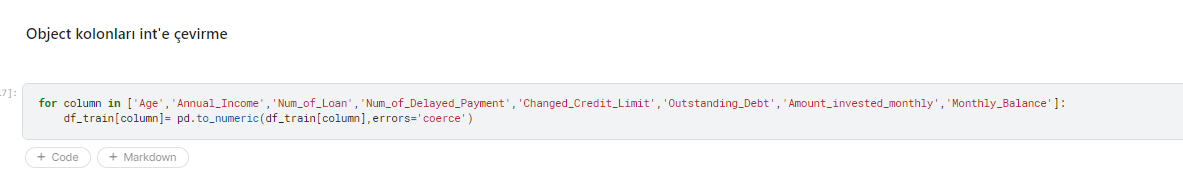

# 2- Veriyi Filtreleme

In [ ]:
selected_age= df_train[(df_train['Age']>=1)& (df_train['Age']<=100)['Age']]
selected_age

## 3- Kolon Silme

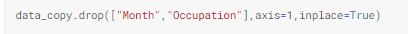

## 4 Copy() Mantığı

In [2]:
import pandas as pd

# Örnek bir DataFrame oluşturalım
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# df_copy adında df'nin bir kopyasını oluşturalım
df_copy = df.copy()

# Şimdi df_copy üzerinde bir değişiklik yapalım
df_copy['C'] = [7, 8, 9]

print("Orijinal DataFrame:")
print(df)
print("\nKopyalanan DataFrame:")
print(df_copy)


Orijinal DataFrame:
   A  B
0  1  4
1  2  5
2  3  6

Kopyalanan DataFrame:
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


## Copy() Kullanmazsan

In [3]:
import pandas as pd

# Örnek bir DataFrame oluşturalım
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# df_copy adında df'nin bir kopyasını oluşturalım
df_copy = df

# Şimdi df_copy üzerinde bir değişiklik yapalım
df_copy['C'] = [7, 8, 9]

print("Orijinal DataFrame:")
print(df)
print("\nKopyalanan DataFrame:")
print(df_copy)


Orijinal DataFrame:
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

Kopyalanan DataFrame:
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


## 5- Eksik Veri Sorunu

##   5.1

## Numerik verilerin diğer benzeri değerler ile doldurulması

In [ ]:
# https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data
# Numerik Verilerin Doldurulması

def fill_na_num(data, val):
    # Eksik değerlerin indekslerini bul
    index_nan = list(data[val][data[val].isnull()].index)
    
    # Eksik değerleri doldurma döngüsü
    for i in index_nan:
        # Eksik değeri doldurmak için aynı "Customer_ID" ile diğer değerlerin medyanını al
        val_pred = data[val][data["Customer_ID"] == data.iloc[i]["Customer_ID"]].median()
        
        # Değişkenin genel medyanını al
        val_mmedian = data[val].median()
        
        # Eğer eksik değer için medyan değeri mevcutsa, eksik değeri bu medyan ile doldur
        if not pd.isna(val_pred):
            data[val].iloc[i] = val_pred
        # Eğer eksik değer için medyan değeri yoksa, değişkenin genel medyanı ile doldur
        else:
            data[val].iloc[i] = val_mmedian
    
    # Eksik değerlerin doldurulmuş yeni değerlerini içeren listeyi döndür
    return list(data[val])

# Her bir sayısal sütun için eksik değerleri doldur

df["Monthly_Inhand_Salary"] = fill_na_num(data=df, val="Monthly_Inhand_Salary")
df["Num_Bank_Accounts"] = fill_na_num(data=df, val="Num_Bank_Accounts")
df["Num_of_Loan"] = fill_na_num(data=df, val="Num_of_Loan")
df["Num_of_Delayed_Payment"] = fill_na_num(data=df, val="Num_of_Delayed_Payment")
df["Changed_Credit_Limit"] = fill_na_num(data=df, val="Changed_Credit_Limit")
df["Num_Credit_Inquiries"] = fill_na_num(data=df, val="Num_Credit_Inquiries")

df["Amount_invested_monthly"] = fill_na_num(data=df, val="Amount_invested_monthly")
df["Monthly_Balance"] = fill_na_num(data=df, val="Monthly_Balance")

# Eksik değerleri kontrol et
df.isnull().sum()


## 5.2

## Kategorik değerlerin diğer benzeri değerler ile doldurulması

In [ ]:
def fill_na_cat(data, val):
    index_nan=list(data[val][data[val].isnull()].index)
    for i in index_nan:
        val_pred=data[val][data["Customer_ID"]==data.iloc[i]["Customer_ID"]].mode()[0]
        val_mode=data[val].mode()[0]
        if not pd.isna(val_pred):
            data[val].iloc[i]=val_pred
        else:
            data[val].iloc[i]=val_mode
    return list(data[val])

In [ ]:
## fill nan values for category variables
df["Occupation"]=fill_na_cat(data=df,val="Occupation")
df["Credit_Mix"]=fill_na_cat(data=df,val="Credit_Mix")
df["Payment_Behaviour"]=fill_na_cat(data=df,val="Payment_Behaviour")
df.isnull().sum()

##  5.3
### Belli bir aralıkta ki değerlerin dışındaki değerleri ortalama ile doldurma

In [ ]:
selected_age= df_train[(df_train['Age']>=1)& (df_train['Age']<=100)['Age']]
selected_age

In [ ]:
# Age sütununda 1 ile 100 arasında olmayan değerleri filtrelereyerk ortalama değeri hesaplama
ortalama_age=selected_age.mean()

# koşulu sağlamayan değerleri ortalama ile değşitirme
df_train.loc[(df_train['Age']<1) | (df_train['Age']>100),'Age']=ortalama_age

# değişiklikleri kontrol etmek içi 'Age' sütununu göster
print(df_train['Age'])

## 5.4

### Veride olmaması gereken karakteri değiştirme replace ile

In [ ]:
wrong_numeric_list=["Age","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit","Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]

for i in wrong_numeric_list:
    print(data_copy[i].unique())

#######################

for i in wrong_numeric_list:
    data_copy[i]=data_copy[i].str.replace("_","")
    try:
        data_copy[i]=data_copy[i].astype("float")
        data_copy[i]=data_copy[i].astype("float")
    except:
        continue

## 5.5

## Veriyi split ile düzeltme

In [ ]:
def month_cover(x):
    if pd.notnull(x):
        num1=int(x.split(" ")[0])
        num2=int(x.split(" ")[3])
        
        return (num1*12)+num2
    else:
        return x
    
###################

data_copy['Credit_History_Age'] = data_copy.Credit_History_Age.apply(lambda x: month_cover(x)).astype(float)
data_copy['Credit_History_Age'].head()

## 5.6

## Veriyi replace ile düzeltme

In [ ]:
data_copy['Payment_Behaviour']= data_copy['Payment_Behaviour'].replace("!@9#%8",np.nan)
data_copy['Payment_Behaviour'].value_counts()

## 5.7 

## KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

for col in data_copy.columns[-8:].tolist():
    imputer.fit(data_copy[['Customer_ID',col]])
    data_copy[['Customer_ID',col]] = imputer.transform(data_copy[['Customer_ID',col]])

data_copy.isnull().sum()

##  6-try,except ve astype

In [ ]:
for i in wrong_numeric_list:
    data_copy[i]=data_copy[i].str.replace("_","")
    try:
        data_copy[i]=data_copy[i].astype("float")
        data_copy[i]=data_copy[i].astype("float")
    except:
        continue

## 7-Korelasyon Matrix

In [ ]:
# correlation analysis
df_corr=data_copy.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("correlation matrix", color="red",fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

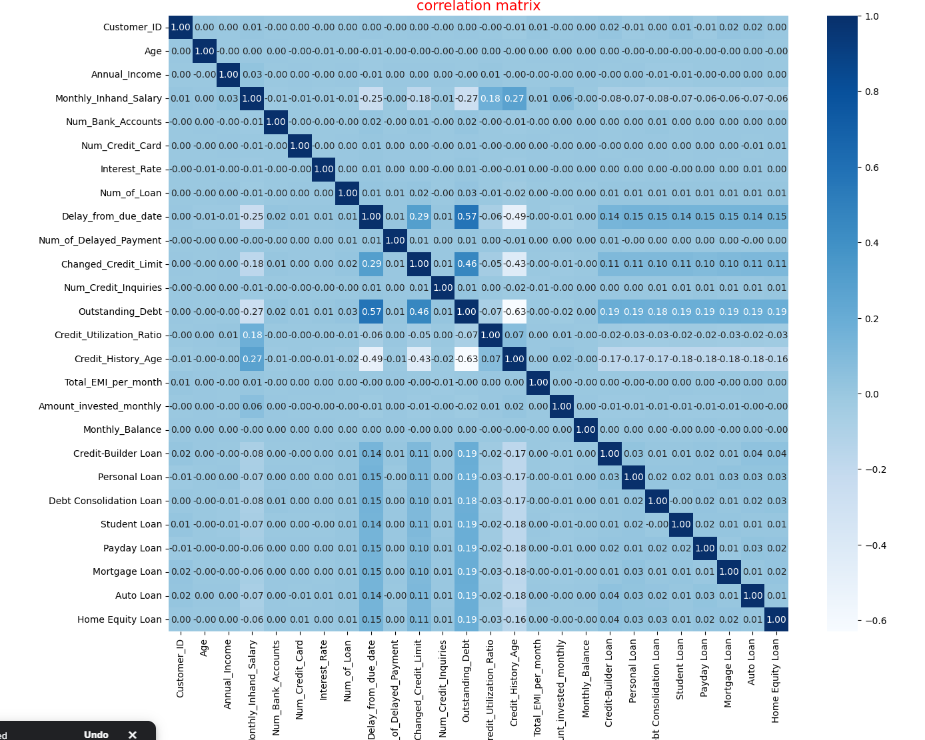

In [4]:
# Farklı bir korelasyon matrix
# Kodun kaynağı:https://www.kaggle.com/code/erdemerzurumlu/smoker-prediction/edit
mask = np.triu(np.ones_like(train.corr()))
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), cmap="BuGn", annot=True, mask=mask,vmin=-1,vmax=1);

NameError: name 'np' is not defined

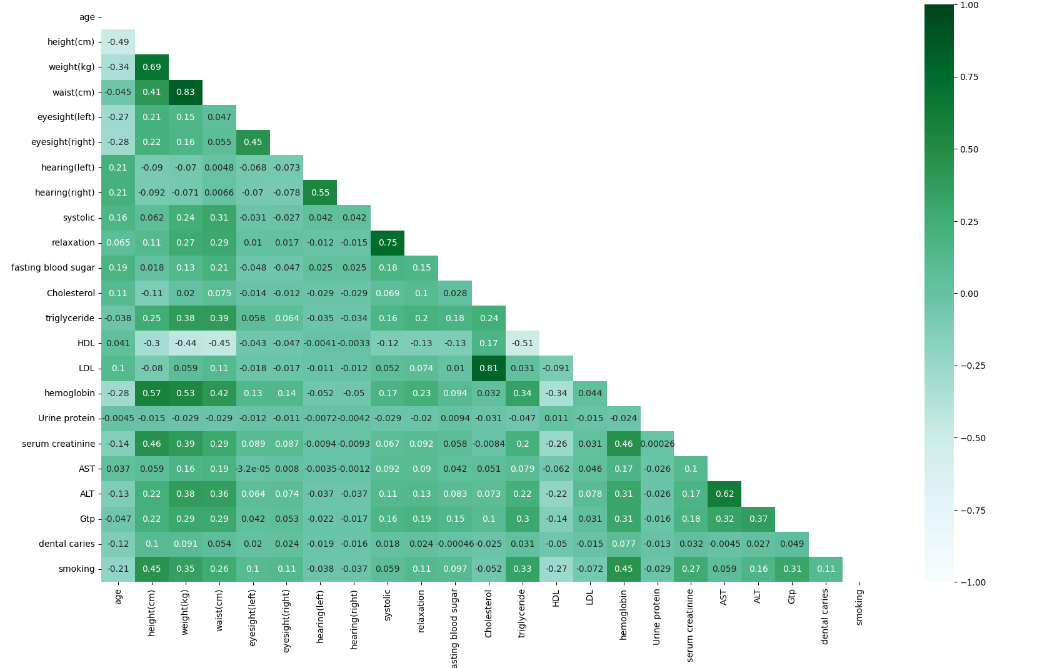

## 7.1

## Hedef Değişken ile diğer değişkenler arasındaki korelasyonun grafiği

In [ ]:
# Smoker prediction dan alındı üsteki grafik gibi
# https://www.kaggle.com/code/erdemerzurumlu/smoker-prediction/edit

correlation_matrix = train.corr()  # df, veri çerçevesi adını temsil eder
gender_correlations = correlation_matrix['smoking'].drop('smoking').sort_values(ascending=False)  # Gender sütununun diğer sütunlarla korelasyonu


# Korelasyonları görselleştirmek için bir figür oluştur
plt.figure(figsize=(10, 8))

# Korelasyonları yatay çubuk grafiklerle göster
sns.barplot(x=gender_correlations.values, y=gender_correlations.index, palette='viridis')

# Grafik başlığı ve ekseni ayarla
plt.title('Korelasyonlar - Smoking ile Diğer Değişkenler Arasında', fontsize=16)
plt.xlabel('Korelasyon Katsayısı', fontsize=14)
plt.ylabel('Değişkenler', fontsize=14)

# Grafik göster
plt.show()


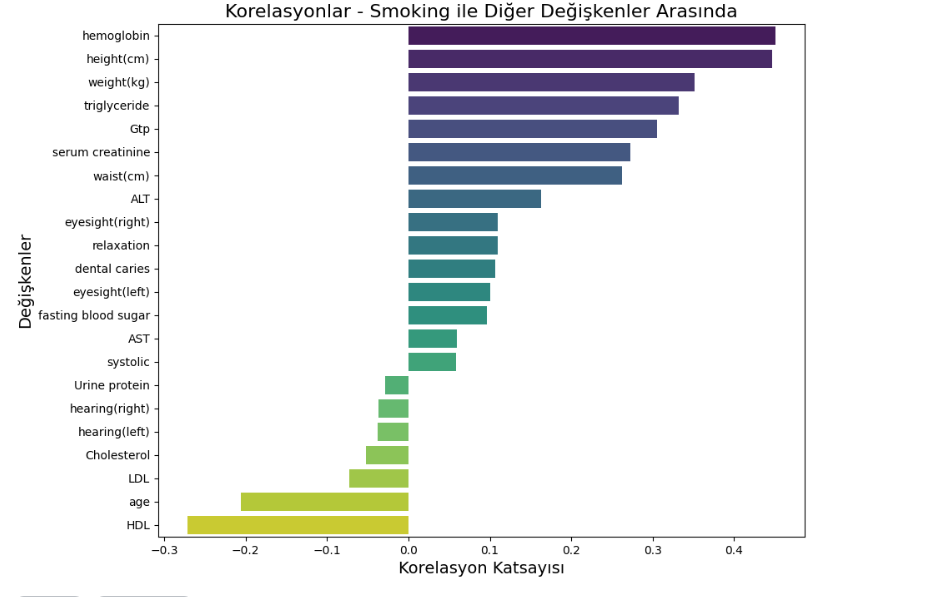

# 8-Kutu Bıyık Grafiği Çizme

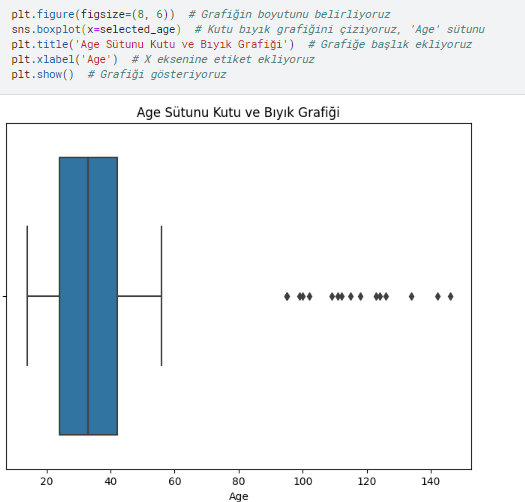

## 9 Grafikler

##  9.1

## Smoker Predcition için Violinplot çizme

In [ ]:
# https://www.kaggle.com/code/erdemerzurumlu/smoker-prediction/edit

target = 'smoking'

full_features = test.columns
num_var = [column for column in test.columns if test[column].nunique() > 10]
cat_var = [column for column in test.columns if test[column].nunique() < 10]


num_rows = len(num_var)
num_cols = 3

total_plots = num_rows * num_cols
plt.figure(figsize=(12, num_rows * 1.75))

for idx, col in enumerate(num_var):
    plt.subplot(7, 3, idx % total_plots + 1)
    sns.violinplot(x=target, y=col, data=train)
    plt.title(f"{col} Distribution for target")

plt.tight_layout()
plt.show()

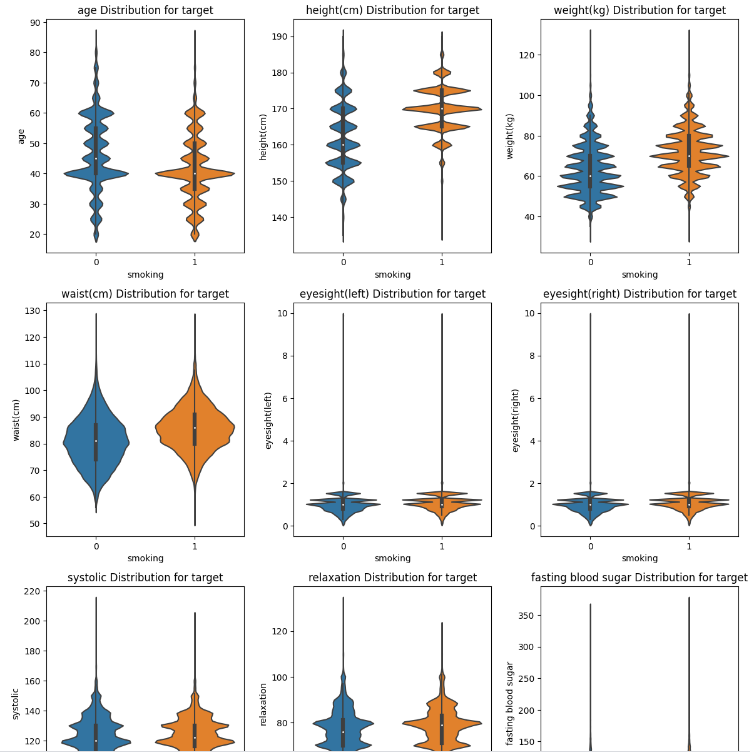

In [ ]:
#https://www.kaggle.com/code/erdemerzurumlu/smoker-prediction/edit

fig,axes = plt.subplots(23,2,figsize=(10, 40),dpi=300)

for ind,col in enumerate(train.columns):
    if train[col].nunique()!=2:
        plt.subplot(23,2,2*ind+1)
        sns.histplot(train[col],bins=15,kde=True)
        plt.gca().set_title(col)
    elif col!="smoking":
        plt.subplot(23,2,2*ind+1)
        sns.countplot(data = train,x=col,hue="smoking")
        plt.gca().set_title(col)
    else:
        plt.subplot(23,2,2*ind+1)
        sns.countplot(data = train,x=col)
        plt.gca().set_title(col)
    
    if train[col].nunique()!=2:
        plt.subplot(23,2,2*ind+2)
        sns.boxplot(train[col],orient="h",palette="BuGn")
        plt.gca().set_title(col)
    
    else:
        plt.subplot(23,2,2*ind+2)
        sns.histplot(binwidth=0.5, x="dental caries", hue="smoking", data=train, stat="count", multiple="stack",palette="BuGn")
        plt.gca().set_title(col)

fig.tight_layout()
plt.show()
    
        

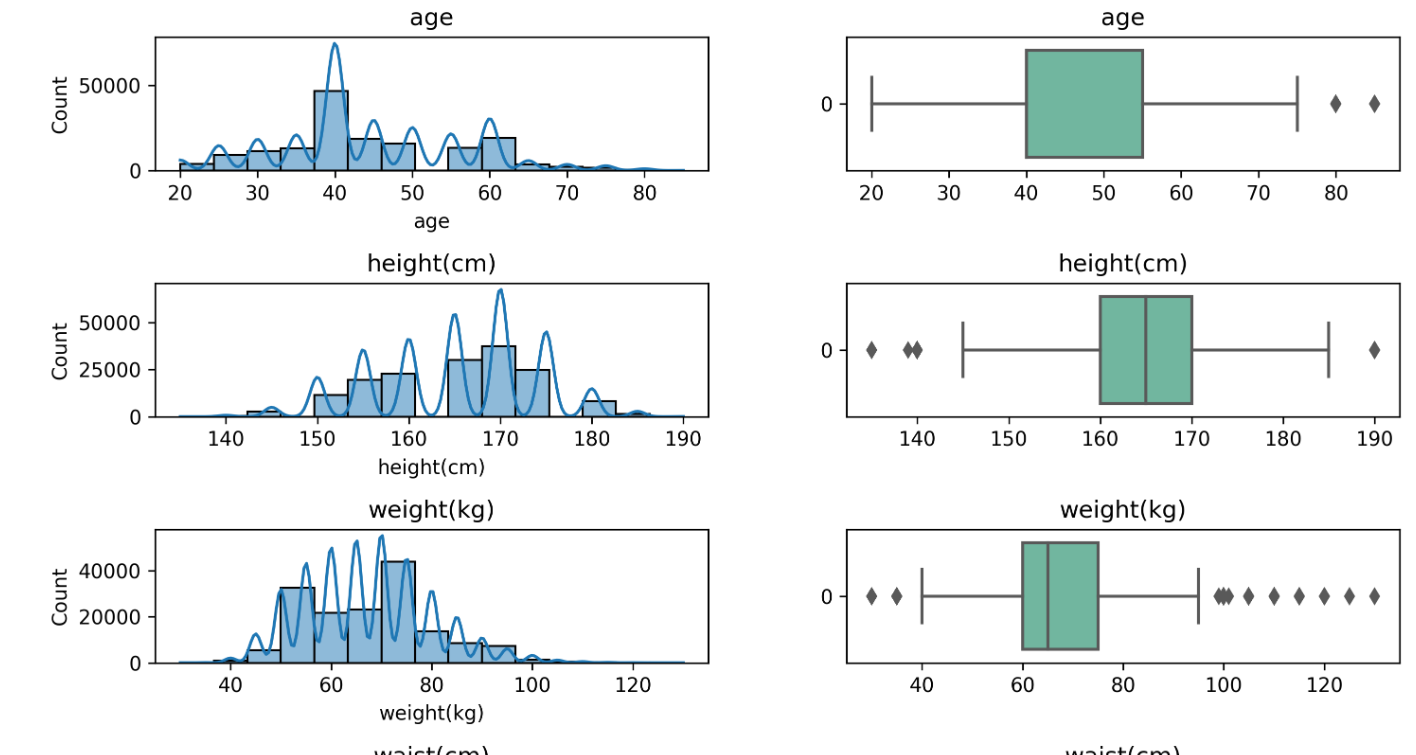

## 9.2

## Credit Classification için grafik çizme

In [ ]:
 ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data_copy[col],shade=True, hue=data_copy["Credit_Score"])
    plt.legend()

plt.tight_layout()

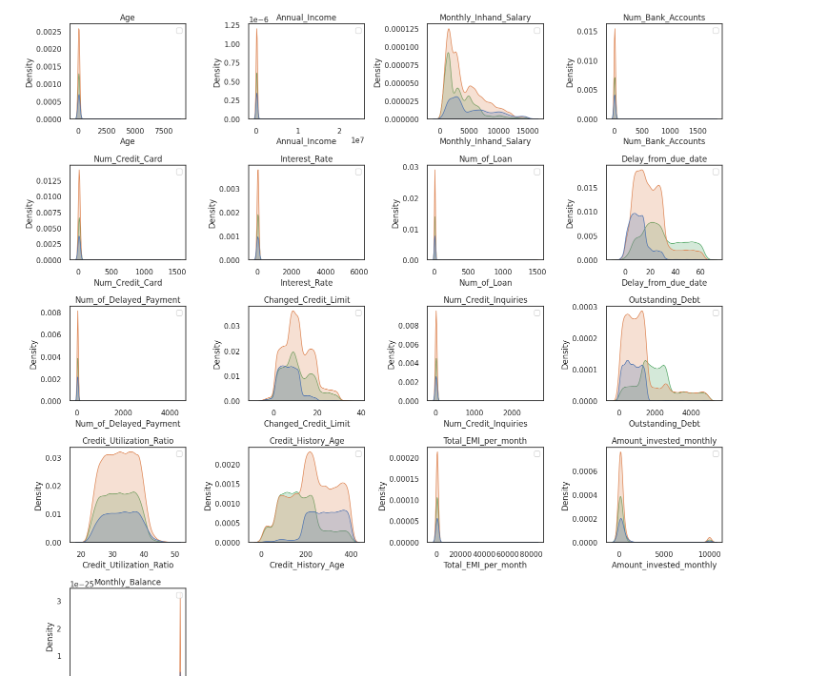

## 10 Outlier değerleri belirleme ve onları medyan ile doldurma

In [ ]:
def ouitlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = ouitlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
# check outlier
for col in num_cols:
    print(col, check_outlier(data_copy,col))

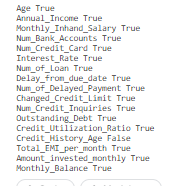

In [ ]:
# Let's fill the outliers with the median value of the relevant variable
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = ouitlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].median()
    dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].median()
    
for col in num_cols:
    print(col, replace_with_thresholds(data_copy,col))

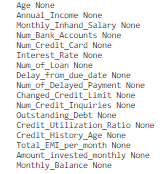

## 11- Str değerlerin yerine sayılar yazarak int e çevirme (map)

In [ ]:
# 'Credit_Score' sütunundaki kategorik değerlere karşılık gelen sayısal değerlerin eşlemesi
score_mapping = {'Standard': 0, 'Poor': 1, 'Good': 2}

# 'Credit_Score' sütununu eşleme yardımıyla dönüştürme
df_train['Credit_Score'] = df_train['Credit_Score'].map(score_mapping)

# Sonucu kontrol etme
print(df_train['Credit_Score'].value_counts())
